data set link : https://www.kaggle.com/gauravduttakiit/resume-dataset

## various tasks at hand:
1. Exploratory Data Analysis
2. Data pre-processing
3. Data Modeling (with Training/Test Data)
4. Learining the top keywords across resumes.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting data from csv file

In [7]:
# Reading the dataset
df = pd.read_csv('UpdatedResumeDataSet.csv')

# First 5 records of dataset

In [8]:
# first 5 records of dataset
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."


# Dimensions of dataset

In [9]:
#dimensions of dataset
df.shape

(962, 2)

# Exploring Categories

In [10]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

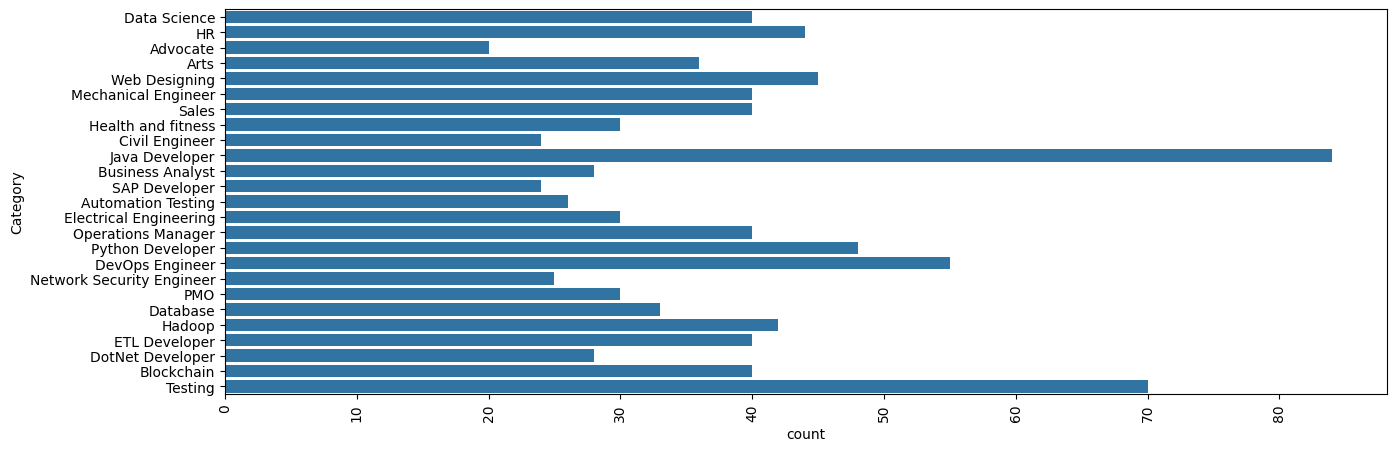

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [11]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

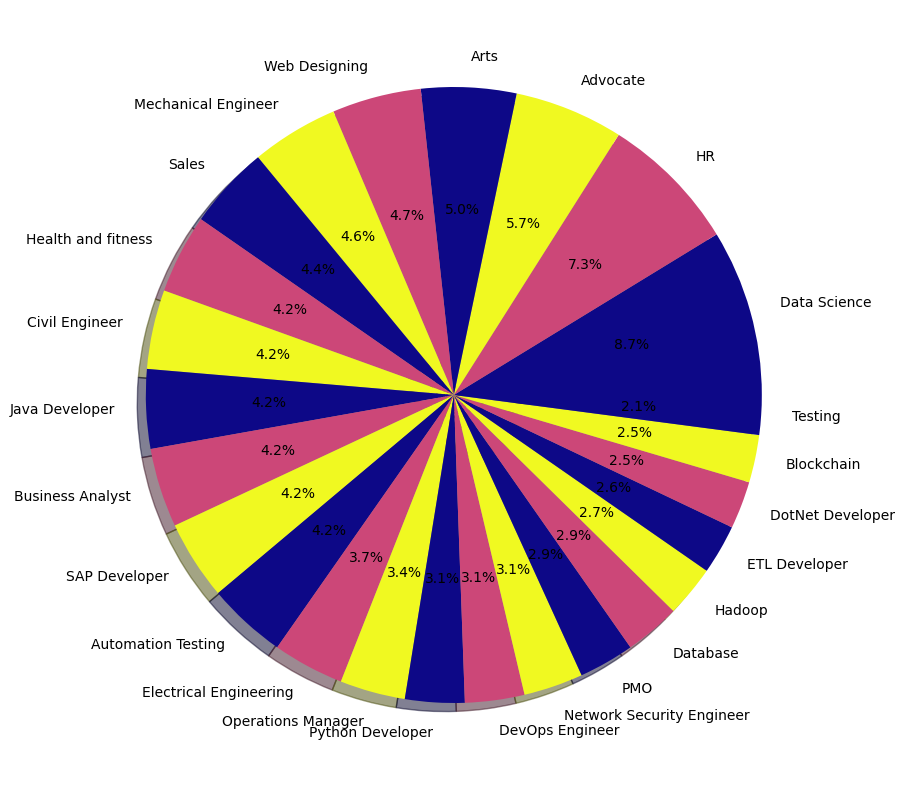

In [32]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

# Exploring Resume

In [12]:
df['Category'][0]

'Data Science'

In [13]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \n\nData Science Assurance Associate \n\nData Science Assurance Associate - Ernst & Young LLP\nSkill Details \nJAVASCRIPT- Exprience - 24 months\njQuery- Exprience - 24 months\nPython- Exprience - 24 monthsCompany Details \ncompany - Ernst & Young LLP\ndescription - Fraud Investigations and Dispute Servi

# Cleaning Data:                                      
1 URLs,                                                
2 hashtags,                                             
3 mentions,                                                     
4 special letters,                                             
5 punctuations:                                             

In [14]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [15]:
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [16]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [17]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

# words into categorical values

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [20]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [21]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

# Vectorization

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

# Splitting

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)

In [25]:
X_train.shape

(769, 7351)

In [26]:
X_test.shape

(193, 7351)

# Now let’s train the model and print the classification report:

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=12))
# clf.fit(X_train,y_train)
# ypred = clf.predict(X_test)
# print(accuracy_score(y_test,ypred))

# Initialize KNeighborsClassifier model
knn_clf = KNeighborsClassifier()

# Hyperparameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # Specify different values of n_neighbors to try

# Initialize GridSearchCV with the KNeighborsClassifier model and parameter grid
grid_search = GridSearchCV(estimator=knn_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_neighbors': 3}


## Model fitting


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=best_params['n_neighbors']))
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print("accuracy of model is :",accuracy_score(y_test,ypred))

accuracy of model is : 0.9948186528497409


## Cross validation 

In [34]:
# Perform cross-validation to evaluate model performance
from sklearn.model_selection import  cross_val_score
required_text = tfidf.transform(df['Resume'])
cv_scores = cross_val_score(clf, required_text, df['Category'], cv=7)
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.96376812 0.99275362 1.         0.99270073 1.         0.99270073
 1.        ]
Mean Accuracy: 0.9917033141406356


## Classification report and Confusion Matrix


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         8
   

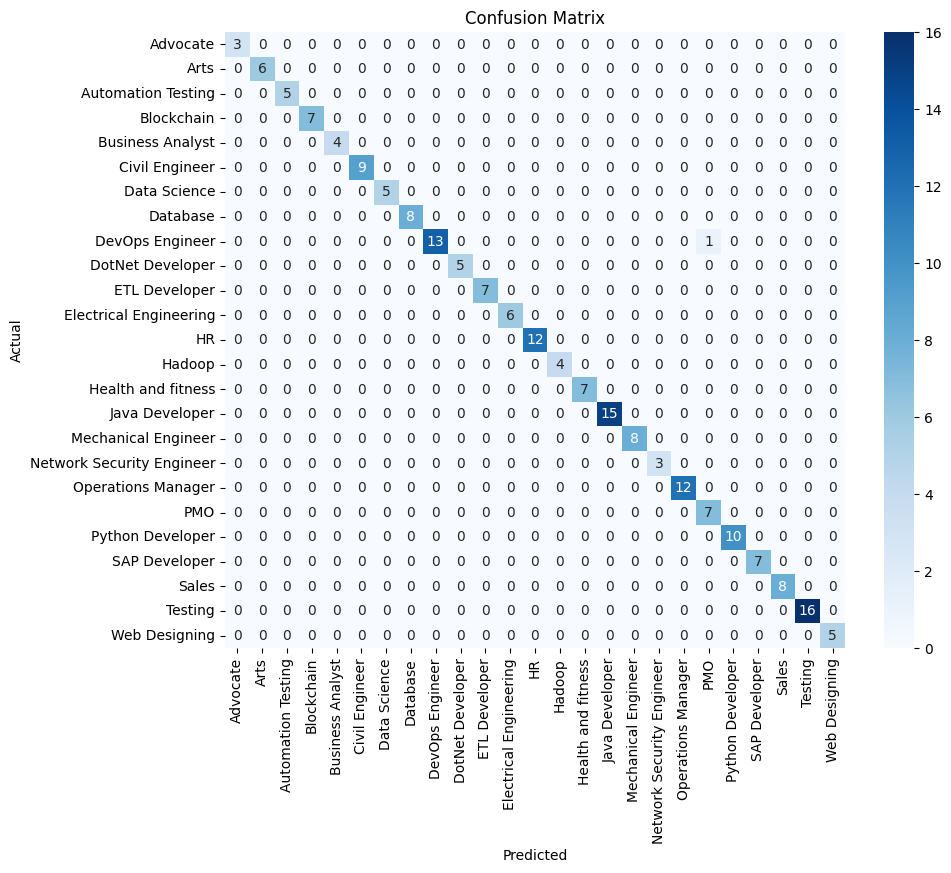

In [35]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Fit the best model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred =clf.predict(X_test)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [36]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23,  6, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20,  6,  6,  7, 23])

# Prediction System

In [ ]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))


# Sample resume for testing

In [44]:
myresume = """
"SKILLS: Ã¢ÂžÂ¢ Knowledge of software / computer: Auto CAD (Included Diploma Academic Syllabus) Ã¢ÂžÂ¢ MSCIT Ã¢ÂžÂ¢ CNC Programming (Fanuc Series) - milling STRENGTHS: Ã¢ÂžÂ¢ Strong Dedication towards work. Ã¢ÂžÂ¢ Quick Learner. Ã¢ÂžÂ¢ Positive thinking and self-confidence. Ã¢ÂžÂ¢ Honest, discipline and hardworking. INDUSTRIAL EXPERIENCE: Ã¢ÂžÂ¢ 10 Day's Industrial Training at Nagpur agro Components, Hingna Road, Nagpur. Ã¢ÂžÂ¢ 10 Day's Industrial Training at METAL FAB High-tech Pvt. Ltd, Hingna Road, Nagpur. EXTRA CRICULUM ACTIVITY: Education Details 
 B.E   RTMNU
Mechanical engineering 


Skill Details 
AUTO CAD- Exprience - 6 months
AUTOMOTIVE- Exprience - 6 months
AUTOMOTIVE CNC- Exprience - 6 months
CAD- Exprience - 6 months
CNC- Exprience - 6 monthsCompany Details 
company - Tata motors, adani, maruti suzuki,jet airways. Air india.
description - 1. I am student of mechanical engineering in the final year. I'm fresher so don't have any experiance in industry.
2. But in 3 rd year the industrial training program conducted by the so 10 days training experiance in the industry.
3. In the 5 th semister the 10 days working in Nagpur Agro Components. While the working all the machine and CNC machine i have seen in industry.
4. In 6 th semister another training program in Metal fab company.
company - No
description - English, Hindi, Marathi

Ã¢ÂžÂ¢ Participate in JSW Urja Project Competition 2017-2018
Ã¢ÂžÂ¢ Machine Assembly Disassembly and Functioning of parts (1 Weeks)

FINAL YEAR PROJECT:

Ã¢ÂžÂ¢ Design nd fabrication of Pneumatic Punching Machine - in BE
Ã¢ÂžÂ¢ Paddle operated Sugarcane Juicer machine - in Diploma Engineering."


"""

# predicting using the stored model

In [45]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)


Predicted Category: Mechanical Engineer
16
